## Simulation-level visualization
This notebook contains code used to produce visualizations for simulation-level dynamics presented in the paper.

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import json
import glob
import itertools
import random

The following code selects a number of sample trials, used for the visualization.

In [6]:
# strict, low, medium and high diversity, respectively
df_lowdiv = pd.read_csv(
    "logs/experiments/0_back/strict/wiki_5_25_wiki_0_92_2_0.01179.txt"
)
df_mdiv = pd.read_csv(
    "logs/experiments/0_back/strict/wiki_14_32_wiki_0_90_2_0.01179.txt"
)
df_strict = pd.read_csv(
    "logs/experiments/0_back/strict/wiki_18_20_wiki_0_71_2_0.01179.txt"
)
# low and high diversity for collaborative condition
df_flex_lowdiv = pd.read_csv(
    "logs/experiments/0_back/flexible/wiki_5_25_wiki_0_92_2_0.01179.txt"
)
df_flex_hdiv = pd.read_csv(
    "logs/experiments/0_back/flexible/wiki_18_20_wiki_0_71_2_0.01179.txt"
)
# low and high diversity for competitive condition
df_short_lowdiv = pd.read_csv(
    "logs/experiments/0_back/shortest/wiki_5_25_wiki_0_92_2_0.01179.txt"
)
df_short_hdiv = pd.read_csv(
    "logs/experiments/0_back/shortest/wiki_18_20_wiki_0_71_2_0.01179.txt"
)

In the next chunks, we extract a number of metrics from the perspective of the speaker and listener

In [7]:
def _get_speaker_metric(df, metric):
    df = df.rename({"prob0": "avg_jump_a0", "prob1": "avg_jump_a1"}, axis=1)
    a0 = df["log_id"].str.split("_").str[:3].str.join("_").iloc[0]
    df[f"{metric}_speaker"] = np.where(
        df["agent"] == a0, df[f"{metric}_a0"], df[f"{metric}_a1"]
    )
    df[f"{metric}_listener"] = np.where(
        df["agent"] == a0, df[f"{metric}_a1"], df[f"{metric}_a0"]
    )
    return df

In [8]:
df_strict = _get_speaker_metric(df_strict, "avg_jump")
df_lowdiv = _get_speaker_metric(df_lowdiv, "avg_jump")
df_mdiv = _get_speaker_metric(df_mdiv, "avg_jump")
df_flex_lowdiv = _get_speaker_metric(df_flex_lowdiv, "avg_jump")
df_flex_hdiv = _get_speaker_metric(df_flex_hdiv, "avg_jump")
df_short_lowdiv = _get_speaker_metric(df_short_lowdiv, "avg_jump")
df_short_hdiv = _get_speaker_metric(df_short_hdiv, "avg_jump")

Additionally, we compute response depletion and the number of metrics.
(We had done in `postprocess.py`, but did not store information for each step of the simulation as 
 it is inefficient in terms of storage, and we only need this information for a few trials)

In [9]:
df_strict["resp_depletion_a0"] = 1 - (
    df_strict["resp_neighbors_a0_current"] / df_strict["resp_neighbors_a0"]
)
df_strict["resp_depletion_a1"] = 1 - (
    df_strict["resp_neighbors_a1_current"] / df_strict["resp_neighbors_a1"]
)
df_lowdiv["resp_depletion_a0"] = 1 - (
    df_lowdiv["resp_neighbors_a0_current"] / df_lowdiv["resp_neighbors_a0"]
)
df_lowdiv["resp_depletion_a1"] = 1 - (
    df_lowdiv["resp_neighbors_a1_current"] / df_lowdiv["resp_neighbors_a1"]
)
df_mdiv["resp_depletion_a0"] = 1 - (
    df_mdiv["resp_neighbors_a0_current"] / df_mdiv["resp_neighbors_a0"]
)
df_mdiv["resp_depletion_a1"] = 1 - (
    df_mdiv["resp_neighbors_a1_current"] / df_mdiv["resp_neighbors_a1"]
)
df_strict = _get_speaker_metric(df_strict, "resp_depletion")
df_lowdiv = _get_speaker_metric(df_lowdiv, "resp_depletion")
df_mdiv = _get_speaker_metric(df_mdiv, "resp_depletion")
df_strict = _get_speaker_metric(df_strict, "resp_neighbors")
df_lowdiv = _get_speaker_metric(df_lowdiv, "resp_neighbors")
df_mdiv = _get_speaker_metric(df_mdiv, "resp_neighbors")

In [10]:
df_flex_lowdiv["resp_depletion_a0"] = 1 - (
    df_flex_lowdiv["resp_neighbors_a0_current"] / df_flex_lowdiv["resp_neighbors_a0"]
)
df_flex_lowdiv["resp_depletion_a1"] = 1 - (
    df_flex_lowdiv["resp_neighbors_a1_current"] / df_flex_lowdiv["resp_neighbors_a1"]
)
df_flex_hdiv["resp_depletion_a0"] = 1 - (
    df_flex_hdiv["resp_neighbors_a0_current"] / df_flex_hdiv["resp_neighbors_a0"]
)
df_flex_hdiv["resp_depletion_a1"] = 1 - (
    df_flex_hdiv["resp_neighbors_a1_current"] / df_flex_hdiv["resp_neighbors_a1"]
)
df_short_lowdiv["resp_depletion_a0"] = 1 - (
    df_short_lowdiv["resp_neighbors_a0_current"] / df_short_lowdiv["resp_neighbors_a0"]
)
df_short_lowdiv["resp_depletion_a1"] = 1 - (
    df_short_lowdiv["resp_neighbors_a1_current"] / df_short_lowdiv["resp_neighbors_a1"]
)
df_short_hdiv["resp_depletion_a0"] = 1 - (
    df_short_hdiv["resp_neighbors_a0_current"] / df_short_hdiv["resp_neighbors_a0"]
)
df_short_hdiv["resp_depletion_a1"] = 1 - (
    df_short_hdiv["resp_neighbors_a1_current"] / df_short_hdiv["resp_neighbors_a1"]
)

df_flex_lowdiv = _get_speaker_metric(df_flex_lowdiv, "resp_depletion")
df_flex_lowdiv = _get_speaker_metric(df_flex_lowdiv, "resp_neighbors")
df_flex_hdiv = _get_speaker_metric(df_flex_hdiv, "resp_depletion")
df_flex_hdiv = _get_speaker_metric(df_flex_hdiv, "resp_neighbors")
df_short_lowdiv = _get_speaker_metric(df_short_lowdiv, "resp_depletion")
df_short_lowdiv = _get_speaker_metric(df_short_lowdiv, "resp_neighbors")
df_short_hdiv = _get_speaker_metric(df_short_hdiv, "resp_depletion")
df_short_hdiv = _get_speaker_metric(df_short_hdiv, "resp_neighbors")

### Experiment 1
Here, pairs alternate in strict turn-taking, and they do not have the possibility to revert to previous states.

**Response depletion** over a full simulation for a low-diversity and a high-diversity pair in the strict turn-taking condition (Experiment 1)

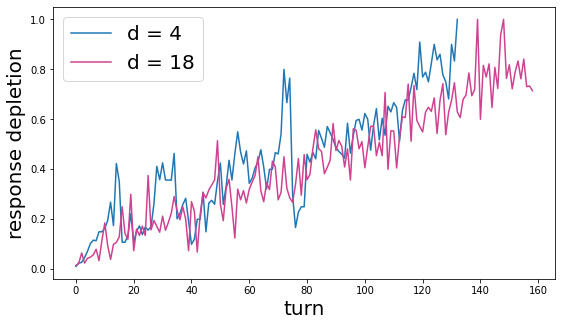

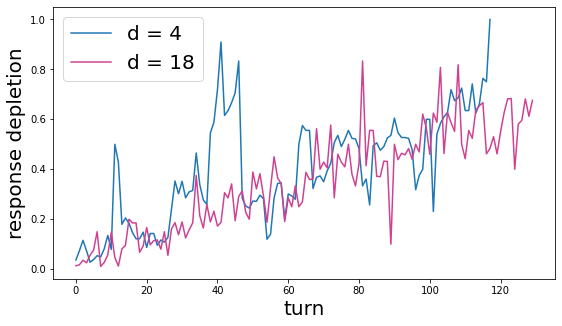

In [11]:
for i, target in enumerate(df_strict.init_seed.unique()[3:5]):
    plt.subplots(figsize=(9, 5))
    sns.lineplot(
        data=df_lowdiv[df_lowdiv["init_seed"] == target],
        x="turn",
        y="resp_depletion_speaker",
        label="d = 4",
    )
    sns.lineplot(
        data=df_strict[df_strict["init_seed"] == target],
        x="turn",
        y="resp_depletion_speaker",
        label="d = 18",
        color=sns.color_palette("PiYG")[0],
    )
    plt.ylabel("response depletion", fontsize=20)
    plt.xlabel("turn", fontsize=20)
    plt.legend(fontsize=20)
    plt.savefig(
        f"paper/figures/neighborhood_depletion_{i}_exp1.png",
        dpi=600,
        bbox_inches="tight",
    )
    plt.show()

The following displays **neighborhood density** over a simulation for a low-diversity and a high-diversity pair. Illustrates density decoupling observed as diversity rises, in Experiment 1.

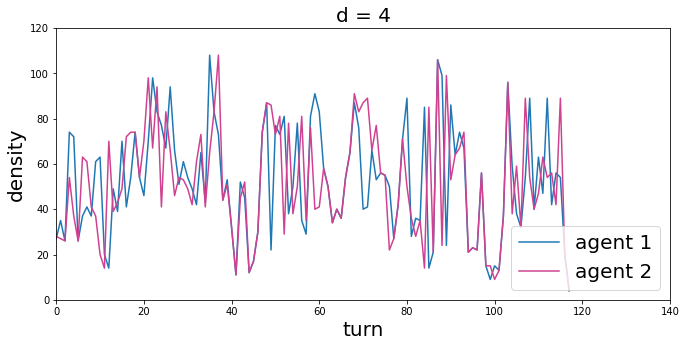

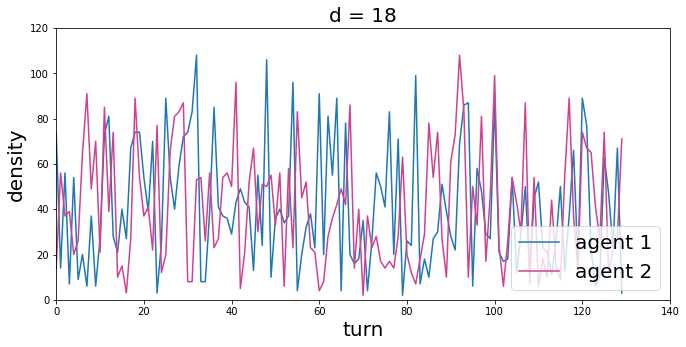

In [12]:
for target in df_strict.init_seed.unique()[4:5]:
    plt.subplots(figsize=(11, 5))
    sns.lineplot(
        data=df_lowdiv[df_lowdiv["init_seed"] == target],
        x="turn",
        y="resp_neighbors_a0",
        label="agent 1",
    )
    sns.lineplot(
        data=df_lowdiv[df_lowdiv["init_seed"] == target],
        x="turn",
        y="resp_neighbors_a1",
        label="agent 2",
        color=sns.color_palette("PiYG")[0],
    )
    plt.ylabel("density", fontsize=20)
    plt.xlabel("turn", fontsize=20)
    plt.legend(loc="lower right", fontsize=20)
    plt.title("d = 4", fontsize=20)
    plt.ylim(0, 120)
    plt.xlim(0, 140)
    plt.savefig("paper/figures/density_exp1_lowdiv.png", dpi=600, bbox_inches="tight")
    plt.show()

    plt.subplots(figsize=(11, 5))
    sns.lineplot(
        data=df_strict[df_strict["init_seed"] == target],
        x="turn",
        y="resp_neighbors_a0",
        label="agent 1",
    )
    sns.lineplot(
        data=df_strict[df_strict["init_seed"] == target],
        x="turn",
        y="resp_neighbors_a1",
        label="agent 2",
        color=sns.color_palette("PiYG")[0],
    )
    plt.ylabel("density", fontsize=20)
    plt.xlabel("turn", fontsize=20)
    plt.legend(loc="lower right", fontsize=20)
    plt.title("d = 18", fontsize=20)
    plt.ylim(0, 120)
    plt.xlim(0, 140)
    plt.savefig("paper/figures/density_exp1_highdiv.png", dpi=600, bbox_inches="tight")
    plt.show()

**Distribution** of neighborhood density values for the listener at the simulation level for a low, medium, and high diversity pair.
Illustrates increased tendency to lead the partner to low-density areas of semantic space as diversity increases in strict turn-taking (Experiment 1).

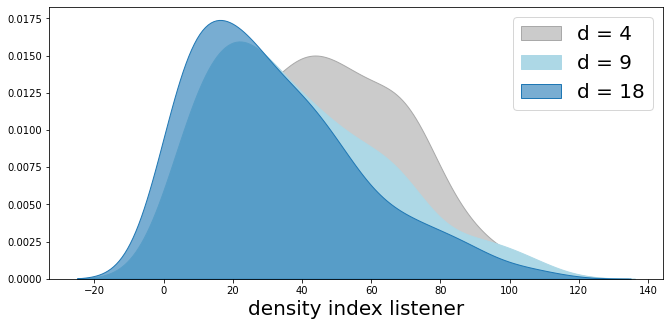

In [13]:
for target in df_strict.init_seed.unique()[4:5]:
    plt.subplots(figsize=(11, 5))
    sns.kdeplot(
        data=df_lowdiv[df_lowdiv["init_seed"] == target],
        x="resp_neighbors_listener",
        label="d = 4",
        fill=True,
        alpha=0.6,
        color="darkgrey",
    )
    sns.kdeplot(
        data=df_mdiv[df_mdiv["init_seed"] == target],
        x="resp_neighbors_listener",
        label="d = 9",
        fill=True,
        alpha=1.0,
        color="lightblue",
    )
    sns.kdeplot(
        data=df_strict[df_strict["init_seed"] == target],
        x="resp_neighbors_listener",
        label="d = 18",
        fill=True,
        alpha=0.6,
    )  #
    plt.legend(fontsize=20)
    plt.xlabel("density index listener", fontsize=20)
    plt.ylabel("", fontsize=20)
    plt.savefig(
        "paper/figures/density_distribution_exp1.png", dpi=600, bbox_inches="tight"
    )
    plt.show()

### Experiment 2
Experiment 2 introduces multiple interaction structures (strict, collaborative, competitive).

In this first chunk, we display the dynamics of exploratory jumps in the competitive condition.

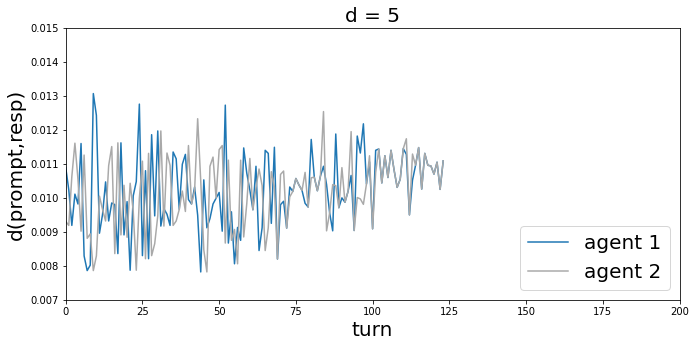

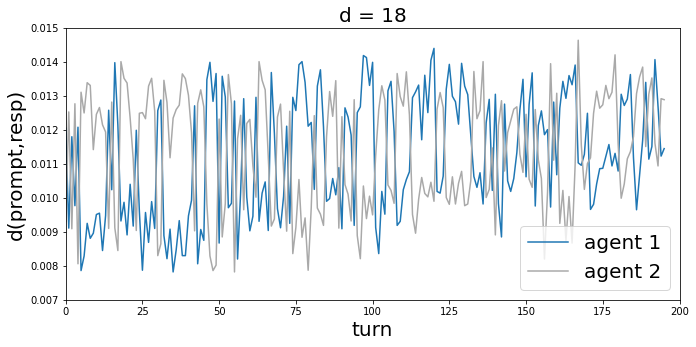

In [16]:
for target in df_strict.init_seed.unique()[4:5]:
    plt.subplots(figsize=(11, 5))
    sns.lineplot(
        data=df_short_lowdiv[df_short_lowdiv["init_seed"] == target],
        x="turn",
        y="avg_jump_a0",
        label="agent 1",
    )
    sns.lineplot(
        data=df_short_lowdiv[df_short_lowdiv["init_seed"] == target],
        x="turn",
        y="avg_jump_a1",
        label="agent 2",
        color="darkgrey",
    )
    plt.ylabel("d(prompt,resp)", fontsize=20)
    plt.xlabel("turn", fontsize=20)
    plt.legend(loc="lower right", fontsize=20)
    plt.title("d = 5", fontsize=20)
    plt.ylim(0.007, 0.015)
    plt.xlim(0, 200)
    plt.savefig(
        "paper/figures/jump_short_exp2_lowdiv.png", dpi=600, bbox_inches="tight"
    )
    plt.show()

    plt.subplots(figsize=(11, 5))
    sns.lineplot(
        data=df_short_hdiv[df_short_hdiv["init_seed"] == target],
        x="turn",
        y="avg_jump_a0",
        label="agent 1",
    )
    sns.lineplot(
        data=df_short_hdiv[df_short_hdiv["init_seed"] == target],
        x="turn",
        y="avg_jump_a1",
        label="agent 2",
        color="darkgrey",
    )
    plt.ylabel("d(prompt,resp)", fontsize=20)
    plt.xlabel("turn", fontsize=20)
    plt.legend(loc="lower right", fontsize=20)
    plt.title("d = 18", fontsize=20)
    plt.ylim(0.007, 0.015)
    plt.xlim(0, 200)
    plt.savefig(
        "paper/figures/jump_short_exp2_highdiv.png", dpi=600, bbox_inches="tight"
    )
    plt.show()

The following display who the turn holder is over an entire simulation in the competitive condition, for a low-diversity and a high-diversity pair.

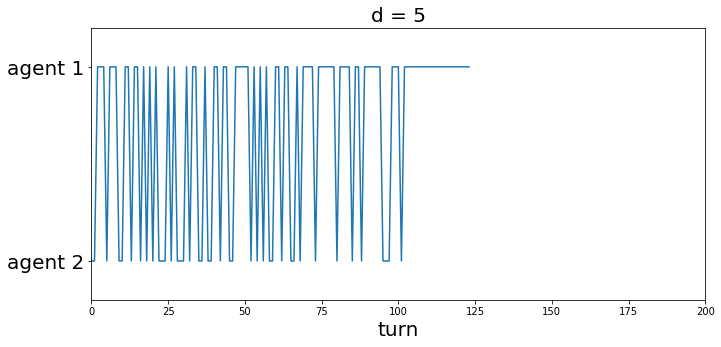

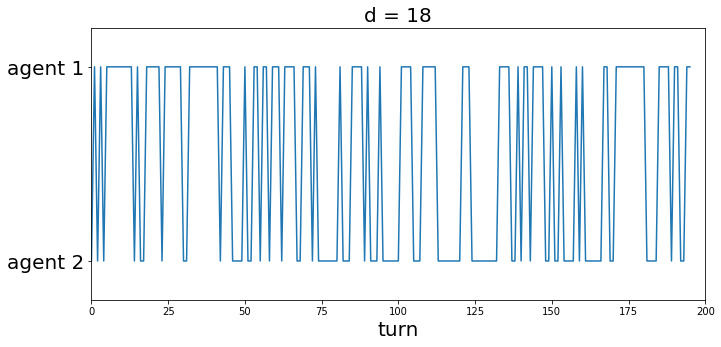

In [15]:
for target in df_strict.init_seed.unique()[4:5]:
    plt.subplots(figsize=(11, 5))
    sns.lineplot(
        data=df_short_lowdiv[df_short_lowdiv["init_seed"] == target],
        x="turn",
        y="agent",
    )
    plt.xlabel("turn", fontsize=20)
    plt.ylabel("")
    plt.title("d = 5", fontsize=20)
    plt.yticks((0, 1), ("agent 2", "agent 1"), fontsize=20)
    plt.ylim(-0.2, 1.2)
    plt.xlim(0, 200)
    plt.savefig(
        "paper/figures/turnholder_short_lowdiv_exp2.png", dpi=600, bbox_inches="tight"
    )
    plt.show()

    plt.subplots(figsize=(11, 5))
    sns.lineplot(
        data=df_short_hdiv[df_short_hdiv["init_seed"] == target], x="turn", y="agent"
    )
    plt.xlabel("turn", fontsize=20)
    plt.ylabel("")
    plt.title("d = 18", fontsize=20)
    plt.yticks((0, 1), ("agent 2", "agent 1"), fontsize=20)
    plt.ylim(-0.2, 1.2)
    plt.xlim(0, 200)
    plt.savefig(
        "paper/figures/turnholder_short_hdiv_exp2.png", dpi=600, bbox_inches="tight"
    )
    plt.show()

The following displays neighborhood density over a simulation for a low- and a high-diversity pair in the competitive condition. This (together with the previous graph) illustrates agents' tendency to engage in protracted periods of individualized exploitation.

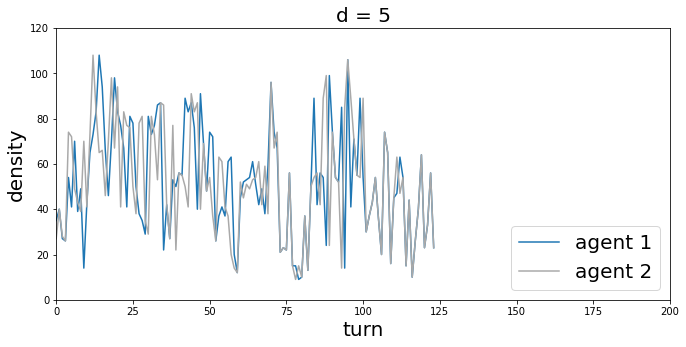

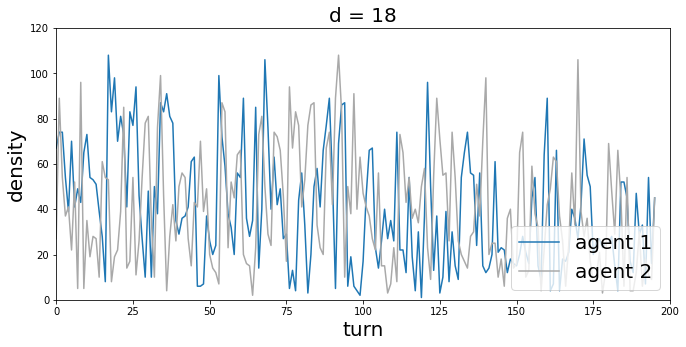

In [18]:
for target in df_strict.init_seed.unique()[4:5]:
    plt.subplots(figsize=(11, 5))
    sns.lineplot(
        data=df_short_lowdiv[df_short_lowdiv["init_seed"] == target],
        x="turn",
        y="resp_neighbors_a0",
        label="agent 1",
    )
    sns.lineplot(
        data=df_short_lowdiv[df_short_lowdiv["init_seed"] == target],
        x="turn",
        y="resp_neighbors_a1",
        label="agent 2",
        color="darkgrey",
    )
    plt.ylabel("density", fontsize=20)
    plt.xlabel("turn", fontsize=20)
    plt.legend(loc="lower right", fontsize=20)
    plt.title("d = 5", fontsize=20)
    plt.ylim(0, 120)
    plt.xlim(0, 200)
    plt.savefig(
        "paper/figures/density_short_exp2_lowdiv.png", dpi=600, bbox_inches="tight"
    )
    plt.show()

    plt.subplots(figsize=(11, 5))
    sns.lineplot(
        data=df_short_hdiv[df_short_hdiv["init_seed"] == target],
        x="turn",
        y="resp_neighbors_a0",
        label="agent 1",
    )
    sns.lineplot(
        data=df_short_hdiv[df_short_hdiv["init_seed"] == target],
        x="turn",
        y="resp_neighbors_a1",
        label="agent 2",
        color="darkgrey",
    )
    plt.ylabel("density", fontsize=20)
    plt.xlabel("turn", fontsize=20)
    plt.legend(loc="lower right", fontsize=20)
    plt.title("d = 18", fontsize=20)
    plt.ylim(0, 120)
    plt.xlim(0, 200)
    plt.savefig(
        "paper/figures/density_short_exp2_highdiv.png", dpi=600, bbox_inches="tight"
    )
    plt.show()